In [1]:
import pandas as pd
products = pd.read_csv('amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [2]:
def count(st):
    split_st = st.split(' ')
    dic ={}
    for s in split_st:
        if s in dic:
            dic[s] += 1
        else:
            dic[s] = 1        
    return dic

In [3]:
x = "I love fish and most bengalis love fish"
count(x)

{'I': 1, 'love': 2, 'fish': 2, 'and': 1, 'most': 1, 'bengalis': 1}

In [4]:
def conv_str(s):    
    for i in products['review']:
        i = str(i)
    return products['review']

In [5]:
type(products.iloc[0]['review'])

str

In [6]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['review']) != str:
        products.iloc[i]['review'] = str(products.iloc[i]['review'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
products.iloc[183220]['review']

nan

In [8]:
products = products.dropna(subset=['review'])

In [9]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['review']) != str:
        print(i)

In [10]:
products['word_count'] = products['review'].apply(count)

In [11]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
import numpy as np

In [14]:
products = products.dropna(subset=['name'])

In [15]:
from collections import Counter
counts = Counter(products['name'])

<BarContainer object of 32313 artists>

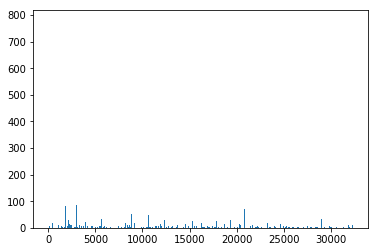

In [16]:
labels, values = zip(*counts.items())
indexes = np.arange(len(labels))
bar_width = 0.35
plt.figure()
plt.bar(indexes, values)

### Define a positive and a negative sentiment

In [17]:
#ignore all 3* rating
products = products[products['rating'] != 3]

In [18]:
#positive sentiment = 4* or 5* reviews


In [19]:
def sentiment(n):
    return 1 if n >= 4 else 0

In [20]:
products['sentiment'] = products['rating'].apply(sentiment)

In [21]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1


In [22]:
print(sentiment(6))

1


### Let's train the sentiment classifier

In [23]:
from sklearn.model_selection import train_test_split
X = products.drop('sentiment', axis=1)

In [24]:
y = products['sentiment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [26]:
from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [29]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1


In [30]:
features = ['name', 'review']

In [31]:
def combined_features(row):
    return row['name'] + ' ' + row['review']

In [32]:
for feature in features:
    products[feature] = products[feature].fillna('')

In [33]:
products['all_features'] = products.apply(combined_features, axis=1)

In [34]:
X = products['all_features']
y = products['sentiment']

In [35]:
X

1         Planetwise Wipe Pouch it came early and was no...
2         Annas Dream Full Quilt with 2 Shams Very soft ...
3         Stop Pacifier Sucking without tears with Thumb...
4         Stop Pacifier Sucking without tears with Thumb...
5         Stop Pacifier Sucking without tears with Thumb...
6         A Tale of Baby\'s Days with Peter Rabbit Lovel...
7         Baby Tracker&reg; - Daily Childcare Journal, S...
8         Baby Tracker&reg; - Daily Childcare Journal, S...
9         Baby Tracker&reg; - Daily Childcare Journal, S...
10        Baby Tracker&reg; - Daily Childcare Journal, S...
11        Baby Tracker&reg; - Daily Childcare Journal, S...
12        Baby Tracker&reg; - Daily Childcare Journal, S...
14        Nature\'s Lullabies First Year Sticker Calenda...
15        Nature\'s Lullabies First Year Sticker Calenda...
16        Nature\'s Lullabies First Year Sticker Calenda...
17        Nature\'s Lullabies Second Year Sticker Calend...
18        Nature\'s Lullabies Second Yea

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train.shape

(124259,)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
ctmTr

<124259x59369 sparse matrix of type '<class 'numpy.int64'>'
	with 7372561 stored elements in Compressed Sparse Row format>

In [40]:
X_test_dtm = cv.transform(X_test)

In [ ]:
'''
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_'''

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred_class = model.predict(X_test_dtm)

In [47]:
accuracy_score(y_test, y_pred_class)

0.9318928054080154

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, y_pred_class)

array([[ 4866,  1700],
       [ 1121, 33733]], dtype=int64)

In [54]:
y_pred_prob1 = model.predict_proba(X_test_dtm)[:, 1]
y_pred_prob1

array([9.98837912e-01, 9.91136758e-01, 9.98013514e-01, ...,
       9.99868278e-01, 9.87787907e-01, 4.92910580e-04])

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob1)

0.9562311850586129